In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


Please contact Eyyüp Toprak for more information.
[eyup.tp@hotmail.com](mailto:eyup.tp@hotmail.com)

Veri setinde NaN değerleri kontrol ediliyor:
ï»¿icerik    0
Kategori     0
dtype: int64
Temizlemeden sonra NaN değerleri kontrol ediliyor:
icerik      0
Kategori    0
dtype: int64
Kategori Etiketleri ve Kodlanmış Değerler:
0: 10GelirVergisiMuafiyetindenFaydalanma Åarti
1: 11DGSOnOnayindaPersonelinAÃ§ilirListedeGorunmemesi
2: 12CBKararÄ±DGSLimit0yadaGiremezsinizUyarÄ±larÄ±
3: 13ButonlarÄ±nPasif_SilikGÃ¶rÃ¼nmesi
4: 14SistemdenMailGelmemesi
5: 15TeknoparktanCÄ±kanFirmalarÄ±nDonemlikRaporGonderimi
6: 16DGSOnOnayAlinmisPersonelDevamDurumuSayfasinaYansimÄ±yor
7: 17MuafiyeteYansiyanPersonelSuresi
8: 18CBKararindaOnOnayBasvurusuYapilmaz
9: 19_3HakemSartÄ±
10: 1PersonelMuafiyetRaporunaYansÄ±mÄ±yor
11: 20EgitimBilgilerindeÄ°stenilenOkulveBolumYok
12: 21TeknoparkDegisimindeFirmaveProjeTasÄ±ma
13: 22PDKSDegisiklikYapilmamasi
14: 23DonemlikveyaMuafiyetRaporundaRevizeSureci
15: 2OtomatikOnaySureci
16: 48TeknikDestek
17: 4BakanlÄ±kAktarÄ±mÄ±naEngelOlanDurumlar
18: 6ElektronikÄ°mzalÄ±GonderimYapilmas

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


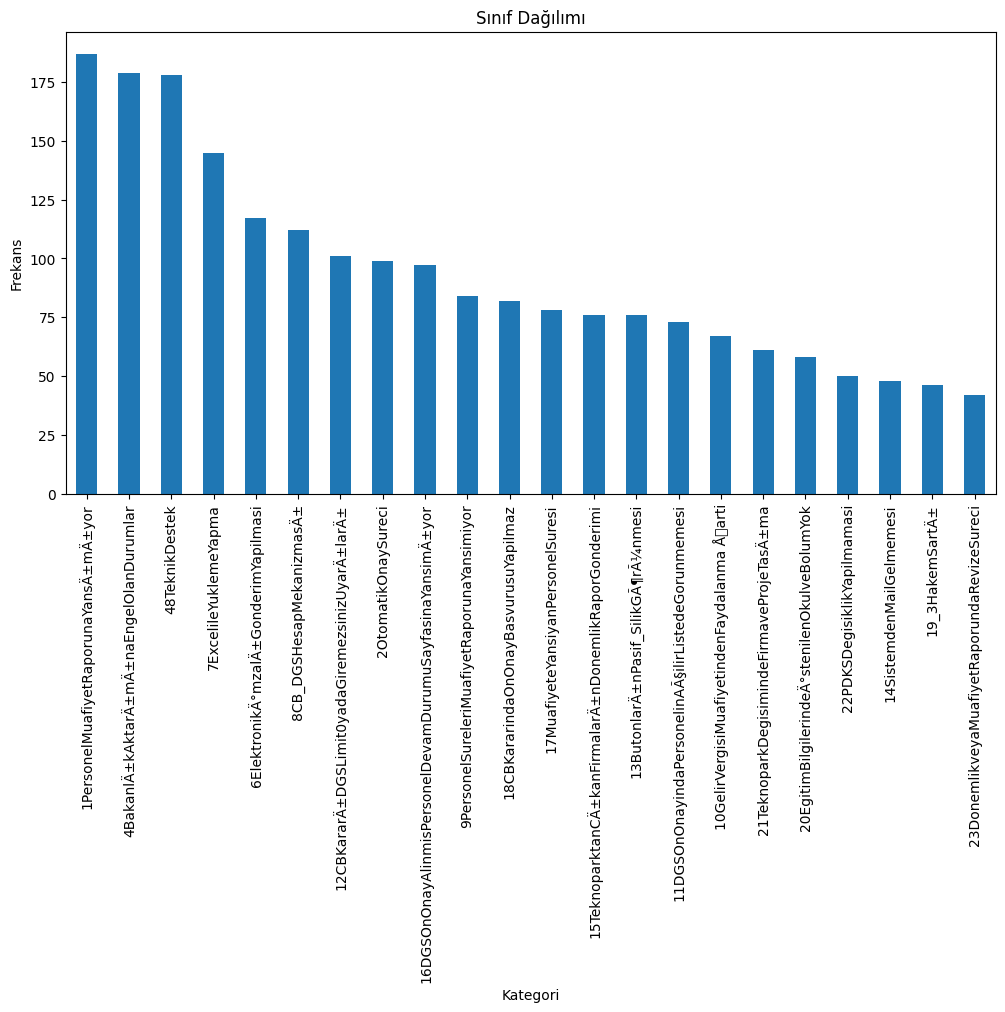

Sınıf Ağırlıkları:
10GelirVergisiMuafiyetindenFaydalanma Åarti: 1.38
11DGSOnOnayindaPersonelinAÃ§ilirListedeGorunmemesi: 1.29
12CBKararÄ±DGSLimit0yadaGiremezsinizUyarÄ±larÄ±: 0.92
13ButonlarÄ±nPasif_SilikGÃ¶rÃ¼nmesi: 1.23
14SistemdenMailGelmemesi: 1.97
15TeknoparktanCÄ±kanFirmalarÄ±nDonemlikRaporGonderimi: 1.23
16DGSOnOnayAlinmisPersonelDevamDurumuSayfasinaYansimÄ±yor: 0.96
17MuafiyeteYansiyanPersonelSuresi: 1.21
18CBKararindaOnOnayBasvurusuYapilmaz: 1.13
19_3HakemSartÄ±: 2.02
1PersonelMuafiyetRaporunaYansÄ±mÄ±yor: 0.50
20EgitimBilgilerindeÄ°stenilenOkulveBolumYok: 1.62
21TeknoparkDegisimindeFirmaveProjeTasÄ±ma: 1.53
22PDKSDegisiklikYapilmamasi: 1.87
23DonemlikveyaMuafiyetRaporundaRevizeSureci: 2.20
2OtomatikOnaySureci: 0.95
48TeknikDestek: 0.53
4BakanlÄ±kAktarÄ±mÄ±naEngelOlanDurumlar: 0.52
6ElektronikÄ°mzalÄ±GonderimYapilmasi: 0.80
7ExcelileYuklemeYapma: 0.64
8CB_DGSHesapMekanizmasÄ±: 0.83
9PersonelSureleriMuafiyetRaporunaYansimiyor: 1.12
SVM with Random Features için GridSearchCV ba

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


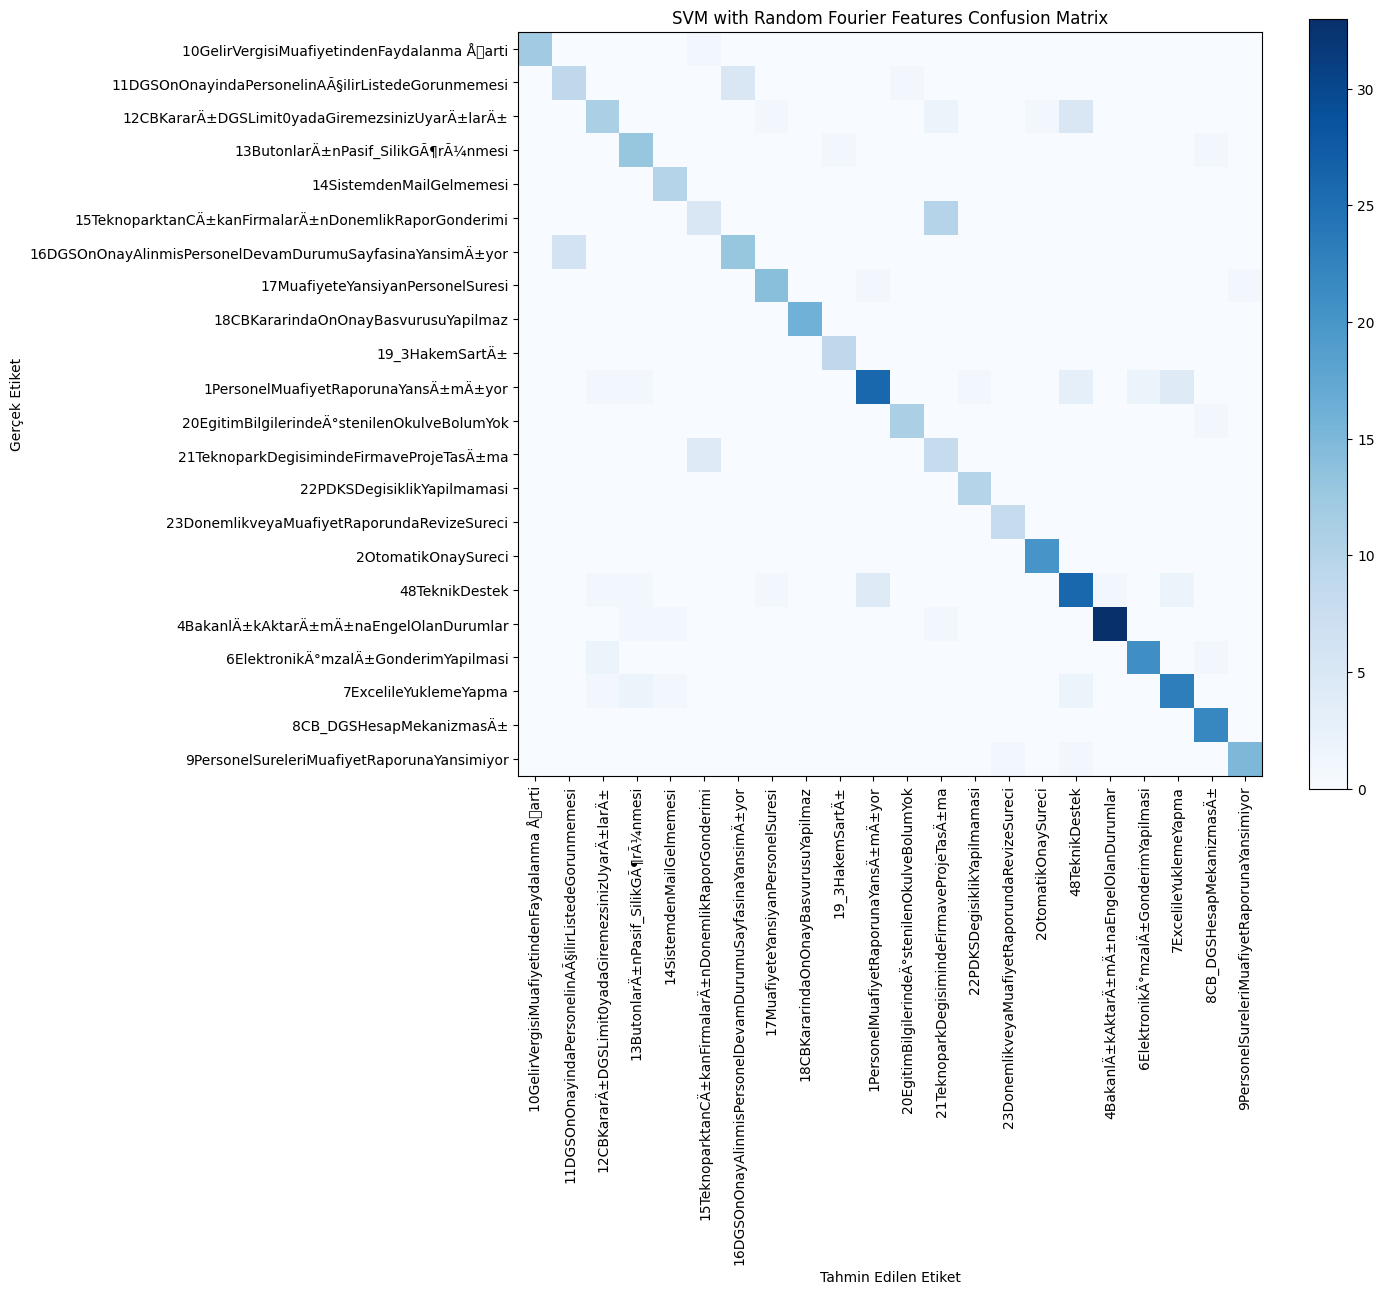

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
)

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import joblib

# Veri setinin yüklenmesi
DATA_PATH = (
)
df = pd.read_csv(DATA_PATH, encoding="ISO-8859-1")

# NaN değerlerin kontrolü ve kaldırılması
print("Veri setinde NaN değerleri kontrol ediliyor:")
print(df.isnull().sum())
df = df.dropna()

# Sütun isimlerinin düzenlenmesi
df.columns = ["icerik", "Kategori"]


def clean_text(text):
    """
    Metni temizler.

    Args:
        text (str): Temizlenecek metin.

    Returns:
        str: Temizlenmiş metin.
    """
   

# Metinlerin temizlenmesi
df["icerik"] = df["icerik"].apply(clean_text)
df["Kategori"] = df["Kategori"].str.strip()

# Nadir sınıfların kaldırılması
category_counts = df["Kategori"].value_counts()
rare_classes = category_counts[category_counts < 2].index
df = df[~df["Kategori"].isin(rare_classes)]

# Tekrar NaN değerlerin kontrolü
print("Temizlemeden sonra NaN değerleri kontrol ediliyor:")
print(df.isnull().sum())

# Kategorilerin encode edilmesi
label_encoder = LabelEncoder()
df["encoded_categories"] = label_encoder.fit_transform(df["Kategori"])

# Kategori ve kodlanmış etiketlerin eşleştirmesini gösteren mapping oluşturma

print("Kategori Etiketleri ve Kodlanmış Değerler:")
for key, value in label_mapping.items():
    print(f"{key}: {value}")

# Mapping'i bir CSV dosyasına kaydetme (isteğe bağlı)
mapping_df = pd.DataFrame(
    list(label_mapping.items()), columns=["Encoded_Label", "Category"]
)
mapping_df.to_csv(
    "",
    index=False,
)
print(
    "Label mapping "
    " "
    "konumuna kaydedildi."
)

# Sınıf dağılımının analizi


# Sınıf dağılımının görselleştirilmesi


# Özellikler ve hedef değişken
X = df["icerik"]
y = df["encoded_categories"]

# Veriyi eğitim ve test olarak ayırma


# TF-IDF Vektörizasyonu


# Sınıf ağırlıklarının hesaplanması

class_weights_dict = dict(enumerate(class_weights))

print("Sınıf Ağırlıkları:")
for idx, weight in class_weights_dict.items():
    class_name = label_encoder.inverse_transform([idx])[0]
    print(f"{class_name}: {weight:.2f}")

# SVM with Random Features için Pipeline ve Parametre Izgarası


# GridSearchCV ile Hiperparametre Ayarlaması
print("SVM with Random Features için GridSearchCV başlatılıyor...")


# En iyi model ile tahminler


# Modelin performans metrikleri
print("SVM with Random Features Sınıflandırma Raporu:")
print(
    classification_report(
        y_test_labels, y_pred_labels, target_names=label_encoder.classes_
    )
)

# En iyi modelin kaydedilmesi

# Vektörizerin kaydedilmesi

joblib.dump(tfidf_vectorizer, vectorizer_path)
print(f"Vektörizer {vectorizer_path} konumuna kaydedildi.")

# LabelEncoder'ın kaydedilmesi

joblib.dump(label_encoder, label_encoder_path)
print(f"LabelEncoder {label_encoder_path} konumuna kaydedildi.")

# Kaydedilen modelin yüklenmesi ve test edilmesi

# Test verisi üzerinde tahmin

print("Yüklenen modelin Sınıflandırma Raporu:")


# Confusion Matrix
conf_matrix = confusion_matrix(y_test_loaded_labels, y_pred_loaded_labels)
plt.figure(figsize=(12, 10))
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("SVM with Random Fourier Features Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(loaded_label_encoder.classes_))
plt.xticks(
    tick_marks, loaded_label_encoder.classes_, rotation=90
)
plt.yticks(tick_marks, loaded_label_encoder.classes_)
plt.ylabel("Gerçek Etiket")
plt.xlabel("Tahmin Edilen Etiket")
plt.show()
